In [ ]:
from astropy.table import Table
import torch

import matplotlib.pyplot as plt
from bliss.reporting import get_snr

import numpy as np

### Check that final individual galaxy dataset is correct

In [ ]:
cat = Table.read("../../../data/catsim_snr.fits")


In [ ]:
high_snr_cat = cat[cat['snr'] > 10]
len(high_snr_cat)

245593

In [ ]:
train_ds = "../../data/datasets/train_ae_ds_42_1.pt" # find in log.txt information (most recent) about this tag

ds = torch.load(train_ds)

In [ ]:
snr = get_snr(ds['noiseless'], ds['background'])

In [ ]:
snr[snr < 10]# check cut in snr was propagated

tensor([], dtype=torch.float64)

(array([1.0968e+04, 1.7417e+04, 1.4265e+04, 1.1030e+04, 8.2810e+03,
        5.9570e+03, 4.3620e+03, 3.0230e+03, 2.1750e+03, 1.4620e+03,
        1.0340e+03, 6.8600e+02, 4.4200e+02, 2.8200e+02, 1.9200e+02,
        1.2100e+02, 7.9000e+01, 4.6000e+01, 2.4000e+01, 6.0000e+00,
        7.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([4.48984623, 4.66337204, 4.83689785, 5.01042366, 5.18394947,
        5.35747528, 5.53100109, 5.70452642, 5.87805223, 6.05157804,
        6.22510386, 6.39862967, 6.57215548, 6.74568129, 6.9192071 ,
        7.09273291, 7.26625872, 7.43978453, 7.61331034, 7.78683567,
        7.96036148, 8.13388729, 8.3074131 , 8.48093891, 8.65446472,
        8.82799053]),
 <BarContainer object of 25 artists>)

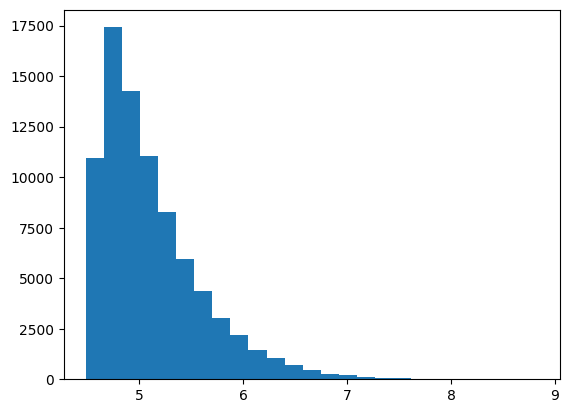

In [ ]:
plt.hist(ds['noiseless'].sum(axis=(1,2,3)).log10(), bins=25)

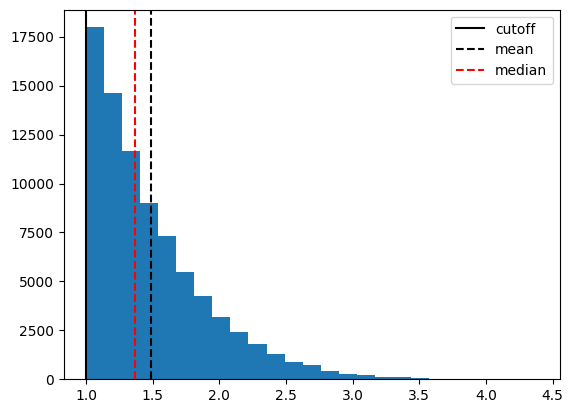

In [ ]:
plt.hist(snr.log10(), bins=25)
plt.axvline(1.0, color='k', linestyle='-', label='cutoff')

plt.axvline(snr.log10().mean(), linestyle='--', color='k', label='mean')
plt.axvline(snr.log10().median(), linestyle='--', color='r', label='median')
plt.legend()

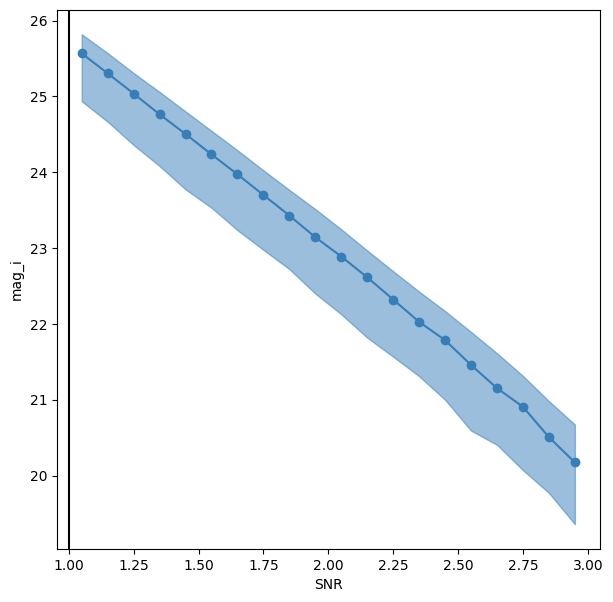

In [ ]:
from bliss.plotting import scatter_shade_plot
fig, ax = plt.subplots(1, 1, figsize=(7,7))
mags = ds['galaxy_params'][:, -2]
scatter_shade_plot(ax, snr.log10(), mags, xlims=(1.0, 3.0), delta=0.1, qs=(0.025, 0.975))
plt.ylabel("mag_i")
plt.xlabel("SNR")
plt.axvline(1.0, color='k')

In [ ]:
# check ellipticity as last thing
from bliss.reporting import get_single_galaxy_ellipticities

ellips = get_single_galaxy_ellipticities(ds['noiseless'][:, 0, :, :], no_bar=False)

Measuring galaxies: 100%|██████████| 81864/81864 [00:22<00:00, 3686.27it/s]


In [ ]:
ellips.shape

torch.Size([81864, 2])

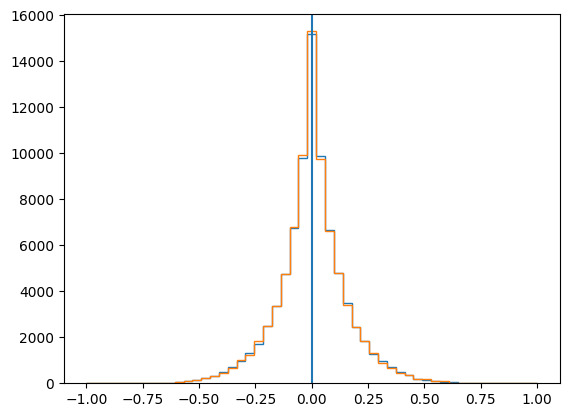

In [ ]:
_, bins, _ = plt.hist(ellips[:, 0], histtype='step', bins=51, range=(-1.0, 1.0))
plt.hist(ellips[:, 1], histtype='step', bins=bins)
plt.axvline(0.0)

In [ ]:
e1 = ellips[:, 0].numpy()
e2 = ellips[:, 1].numpy()
mask = ~np.isnan(e1)
np.mean(e1[mask]), np.mean(e2[mask])

(0.00051688263, 0.0001533509)

In [ ]:
e1 = ellips[:, 0].numpy()
e2 = ellips[:, 1].numpy()
mask = ~np.isnan(e1)
np.std(e1[mask]), np.std(e2[mask])

(0.15373807, 0.15426542)